In [ ]:
##ARIMA AND ARIMAX MODELLING FOR FAMILY_ROOM VARIABLE##

In [2]:
#importing lib and loading file

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
from pandas import Series
from statsmodels.tsa.stattools import adfuller

In [3]:
dataset = read_csv('F:/2018/cdac_project/19-072018/final_dataset.csv',index_col='Date_Time',parse_dates=True)

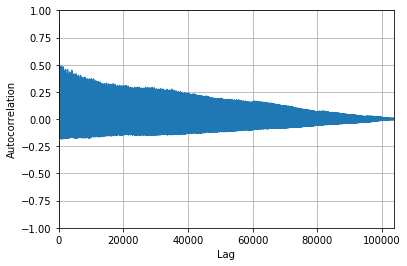

In [4]:
# implementing autocorrelation_plot to select the value of p in ARIMA(p=lag  in autoregression)
Family_Rm_df=dataset['2014-01-01':'2017-01-01'].Family_Rm
autocorrelation_plot(Family_Rm_df)

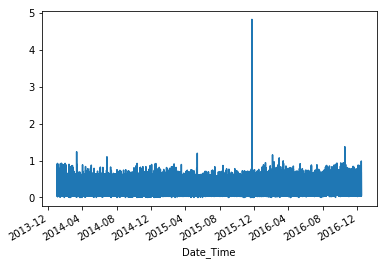

In [6]:
#check for trend visualy
dataset.Family_Rm.plot()


In [7]:
#Augmented Dickey-Fuller test 
#p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

#from statsmodels.tsa.stattools import adfuller
X = Family_Rm_df.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
#Result:p-value less the 0.5 so null hypothesis fails(#it is not statonary).Therefore it is stationary and has no unit root.

ADF Statistic: -45.484456
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [8]:
# view summary of model

model = ARIMA(Family_Rm_df,order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:            D.Family_Rm   No. Observations:               103674
Model:                 ARIMA(2, 1, 0)   Log Likelihood               70864.119
Method:                       css-mle   S.D. of innovations              0.122
Date:                Mon, 23 Jul 2018   AIC                        -141720.237
Time:                        18:00:41   BIC                        -141682.041
Sample:                    01-01-2014   HQIC                       -141708.664
                         - 12-15-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.349e-06      0.000     -0.007      0.995      -0.001       0.001
ar.L1.D.Family_Rm     0.0529      0.003     17.138      0.000       0.047       0.059
ar.L2.D.Family_Rm    -0.

In [9]:
#implementing ARIMA model and getting predictions

X = Family_Rm_df.values
size = int(len(X) * 0.99)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()


for t in range(len(test)):
    model = ARIMA(history, order=(1,0,0))
#When fitting the model, a lot of debug information is provided about the fit of the linear regression model. 
#We can turn this off by setting the disp argument to 0.
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    predi = output[0]
    predictions.append(predi)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (predi, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()



C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=0.073451, expected=0.049883
predicted=0.073333, expected=0.051933


C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=0.075149, expected=0.050117
predicted=0.073539, expected=0.049533
predicted=0.073022, expected=0.050617
predicted=0.073981, expected=0.048500
predicted=0.072105, expected=0.047250
predicted=0.070997, expected=0.053100
predicted=0.076180, expected=0.051933
predicted=0.075146, expected=0.047400
predicted=0.071129, expected=0.657783
predicted=0.611963, expected=0.730483
predicted=0.676382, expected=0.701817


KeyboardInterrupt: 